# Analyse des données de l'assurance maladie sur le mois de janvier 2022

### Contexte

L'assurance maladie en France constitue un pilier fondamental du système de protection sociale, visant à assurer l'accès équitable aux soins de santé pour tous les citoyens et résidents. Dans ce contexte, une analyse approfondie des dépenses engagées par l'assurance maladie revêt une importance primordiale pour évaluer la viabilité et l'efficacité du système de santé français. La compréhension des schémas de dépenses, des tendances évolutives et des facteurs sous-jacents est cruciale pour éclairer les décisions politiques et administratives visant à garantir la durabilité financière tout en préservant l'accès universel aux soins de santé de qualité.

Dans cette optique, une interrogation émergente concerne l'identification des principaux moteurs des dépenses de l'assurance maladie en France.

### Présentation du jeu de données

Le site de l'assurance maladie comporte un onglet "Etudes et données" dans lequel se trouve des études, des synthèses, des articles et des données sur différents thèmes mis à jour tous les mois ou tous les ans.

Pour notre étude, nous avons choisi de nous intéresser aux données mensuelles des dépenses de l'assurance maladie, plus précisément celles de Janvier 2022. Un mois donc banal au niveau de l'actualité sanitaire, mais qui nous permettra de nous faire une idée des dépenses de l'assurance maladie en temps normal.
Il s'agit d'un fichier CSV de 5.35 Go contenant 34 409 062 de lignes et 56 colonnes et délimité par des points-virgules ";". Il est disponible sur le [site de l'assurance maladie](https://assurance-maladie.ameli.fr/etudes-et-donnees/open-damir-depenses-sante-interregimes).

Un fichier Excel est également disponible sur la même page web contenant la signification de chaque colonne du fichier CSV.

# Import des données et des librairies

Au vu de la taille du jeu de données, nous allons en prendre un échantillon de 10% pour pouvoir travailler dessus et le nettoyre. Ensuite nous pourrons commencer l'annalyse des données.

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
raw_data = pd.read_csv('data/A202201.csv', delimiter=';', nrows=3440906)

In [93]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440906 entries, 0 to 3440905
Data columns (total 56 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FLX_ANN_MOI   int64  
 1   ORG_CLE_REG   int64  
 2   AGE_BEN_SNDS  int64  
 3   BEN_RES_REG   int64  
 4   BEN_CMU_TOP   int64  
 5   BEN_QLT_COD   int64  
 6   BEN_SEX_COD   int64  
 7   DDP_SPE_COD   int64  
 8   ETE_CAT_SNDS  int64  
 9   ETE_REG_COD   int64  
 10  ETE_TYP_SNDS  int64  
 11  ETP_REG_COD   int64  
 12  ETP_CAT_SNDS  int64  
 13  MDT_TYP_COD   int64  
 14  MFT_COD       int64  
 15  PRS_FJH_TYP   int64  
 16  PRS_ACT_COG   float64
 17  PRS_ACT_NBR   float64
 18  PRS_ACT_QTE   int64  
 19  PRS_DEP_MNT   float64
 20  PRS_PAI_MNT   float64
 21  PRS_REM_BSE   float64
 22  PRS_REM_MNT   float64
 23  FLT_ACT_COG   float64
 24  FLT_ACT_NBR   float64
 25  FLT_ACT_QTE   int64  
 26  FLT_PAI_MNT   float64
 27  FLT_DEP_MNT   float64
 28  FLT_REM_MNT   float64
 29  SOI_ANN       int64  
 30  SOI_MOI       int6

Premièrement, nous allons établir un persona qui est le plus susceptible a recevoir des soins. Pour ce faire on va commencer par regarder la tranche d'age et le sexe qui sont les plus représentés dans le jeu de données.

In [94]:
ageAndSex = raw_data[["BEN_SEX_COD", "AGE_BEN_SNDS"]]
male = ageAndSex.where(ageAndSex.BEN_SEX_COD == 1)
female = ageAndSex.where(ageAndSex.BEN_SEX_COD == 2)

# histogram of ages by sex

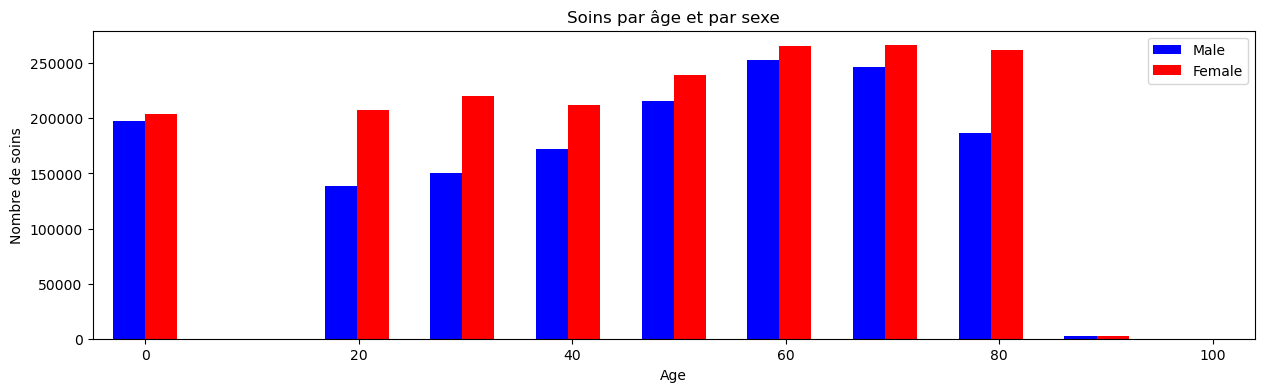

In [95]:
ageAndSex = raw_data[["BEN_SEX_COD", "AGE_BEN_SNDS"]]
male = ageAndSex.where(ageAndSex.BEN_SEX_COD == 1).dropna()
female = ageAndSex.where(ageAndSex.BEN_SEX_COD == 2).dropna()

plt.figure(figsize=(15, 4))

plt.title("Soins par âge et par sexe")
plt.xlabel("Age")
plt.ylabel("Nombre de soins")
plt.hist(male["AGE_BEN_SNDS"], label="Male", color="blue", width=-3)
plt.hist(female["AGE_BEN_SNDS"], label="Female", color="red", width=3)
plt.legend()
plt.show()

Sur le graphique ci-dessus, les femmes sont sur-représentées par rapport aux hommes. 
La tranche d'âge des 60-69 ans et des 70-79 ans sont les plus représentées.

Cela s'explique par le fait que les femmes sont plus suceptibles que les hommes à aller chez le medecin et que les personnes agées sont plus encleines à développer des problèmes de santé (Cancers, maladies cardiovasculaires, etc...).

Les 0-19 sont plus représentés que les autres tranches d'age. Cela peut s'expliquer par le fait que les enfants sont plus susceptibles de tomber malade que les adultes et que la colonne comporte une tranche d'age de 20 ans contre 10 ans pour les autres tranches d'age.

La valeur 99 correspond aux personnes dont l'age est inconnu.

### Est-ce que la région a aussi un impact notre persona ?

Il y a plusieurs facteurs a prendre en compte avant de tirer des conclusions hatives. En effet, il faut prendre en compte la densité de population de chaque région, le nombre de médecins par habitant, le nombre d'hopitaux, etc...

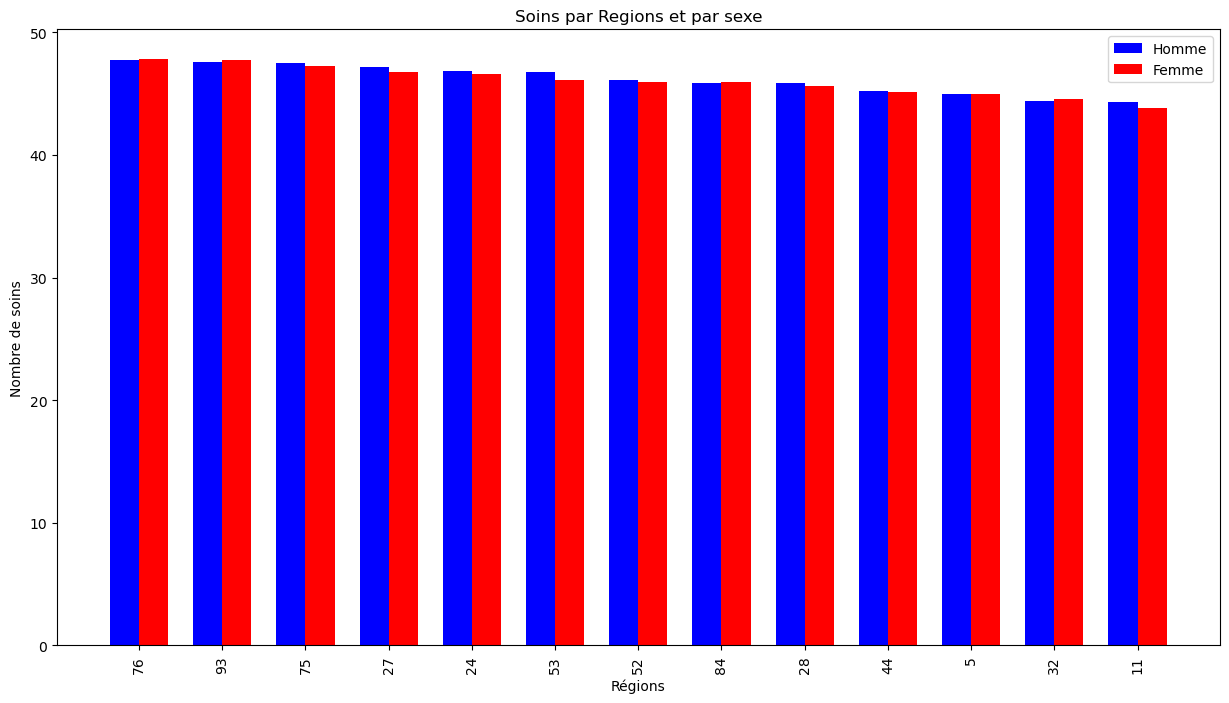

In [96]:
ageAndSex = raw_data[["BEN_SEX_COD", "AGE_BEN_SNDS", "BEN_RES_REG"]]
male = ageAndSex[(ageAndSex.BEN_SEX_COD == 1) & (ageAndSex.AGE_BEN_SNDS != 99) & (ageAndSex.BEN_RES_REG != 99)]
female = ageAndSex[(ageAndSex.BEN_SEX_COD == 2) & (ageAndSex.AGE_BEN_SNDS != 99) & (ageAndSex.BEN_RES_REG != 99)]

male_mean_age_per_localities = male.groupby("BEN_RES_REG").mean().sort_values(by="AGE_BEN_SNDS", ascending=False)
female_mean_age_per_localities = female.groupby("BEN_RES_REG").mean().sort_values(by="AGE_BEN_SNDS", ascending=False)

fig, ax = plt.subplots(figsize=(15, 8))

x = range(len(male_mean_age_per_localities))
bar_width = 0.35

plt.bar(x, male_mean_age_per_localities["AGE_BEN_SNDS"], color="blue", label="Homme", width=bar_width)
plt.bar([i + bar_width for i in x], female_mean_age_per_localities["AGE_BEN_SNDS"], color="Red", label="Femme", width=bar_width)

plt.title("Soins par Regions et par sexe")
plt.xlabel("Régions")
plt.ylabel("Nombre de soins")
plt.xticks([i + bar_width/2 for i in x], male_mean_age_per_localities.index, rotation=90)
plt.legend()
plt.show()

Une moyenne d'âge basse peut indiquer plusieurs choses, telles que :

- La population de la région est principalement composée de jeunes. Cela pourrait suggérer que la région a une population active plus importante, avec un nombre réduit de personnes âgées nécessitant des soins médicaux fréquents. Cela peut être interprété comme un signe positif en termes de santé globale de la population.

- La région bénéficie d'un bon accès aux soins médicaux préventifs. Si la moyenne d'âge est basse, cela peut indiquer que la population a accès à des soins médicaux efficaces, réduisant ainsi le besoin de soins médicaux plus intensifs.

- Le niveau de santé général de la population est élevé. Une moyenne d'âge basse peut refléter une population en bonne santé, ce qui signifie que les habitants de la région sont moins sujets à des maladies graves ou chroniques nécessitant des soins médicaux fréquents.

Ici, on peut voir que les régions 11 (Régions et Départements d'outre-mer), 32 (Hauts-de-France - Nord-Pas-de-Calais-Picardie) et 5 (Régions et Départements d'outre-mer) ont les moyennes d'âge les plus basses.

En revanche, les régions 76 (Languedoc-Roussillon-Midi-Pyrénées), 93 (Provence-Alpes-Côte d'Azur et Corse) et 75 (Aquitaine-Limousin-Poitou-Charentes) ont les moyennes d'âge les plus élevées.

Depuis 1970, OpenDataSoft collecte les données des personnes décédées en France. Selon leur [site](https://public.opendatasoft.com/explore/dataset/liste-des-personnes-decedees-en-france/custom/?sort=death_date) mis à jour tous les mois, Lille (Hauts-de-France) possède le plus grand nombre de personnes décédées (238k), suivi de Toulouse (Occitanie) (221k) et de Nice (Provence-Alpes-Côte d'Azur) (202k).

La basse moyenne d'âge de la région 32 pourrait s'expliquer par la forte mortalité de la région. L'Île-de-France, possédant la plus basse moyenne d'âge, pourrait s'expliquer par le fait que la région est la capitale de la France et que la population y est plus jeune que dans les autres régions.

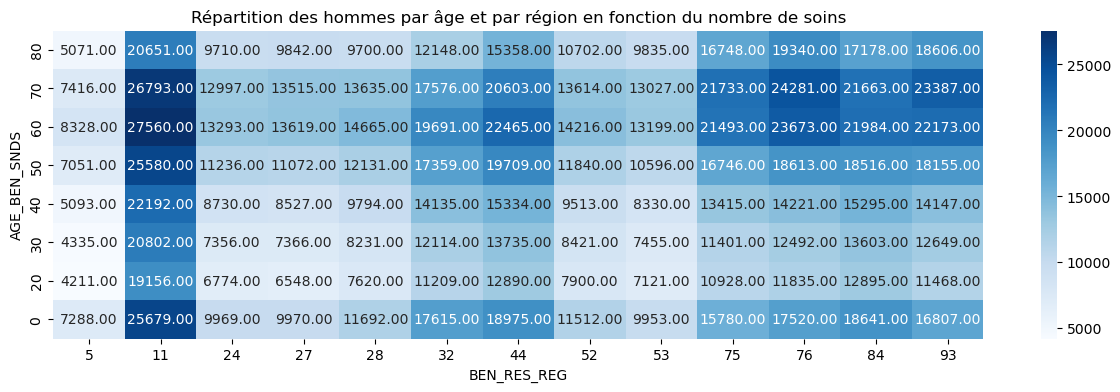

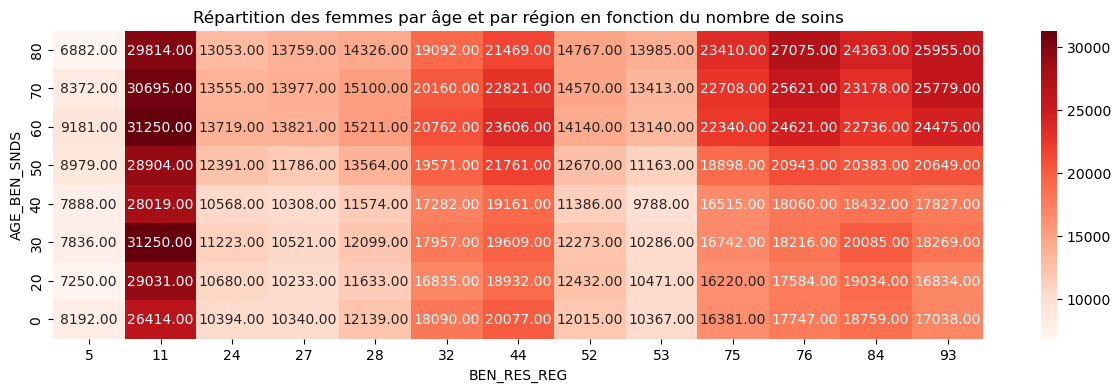

In [102]:
ageAndSex = raw_data[["BEN_SEX_COD", "AGE_BEN_SNDS", "BEN_RES_REG"]]
male = ageAndSex[
    (ageAndSex.BEN_SEX_COD == 1) 
    & (ageAndSex.AGE_BEN_SNDS != 99) 
    & (ageAndSex.BEN_RES_REG != 99)
    ]
female = ageAndSex[
    (ageAndSex.BEN_SEX_COD == 2)
    & (ageAndSex.AGE_BEN_SNDS != 99) 
    & (ageAndSex.BEN_RES_REG != 99)
    ]

male_pivot_table = male.pivot_table(index="AGE_BEN_SNDS", columns="BEN_RES_REG", values="AGE_BEN_SNDS", aggfunc="count").sort_index(ascending=False)
female_pivot_table = female.pivot_table(index="AGE_BEN_SNDS", columns="BEN_RES_REG", values="AGE_BEN_SNDS", aggfunc="count").sort_index(ascending=False)

plt.figure(figsize=(15, 4))
sns.heatmap(male_pivot_table, annot=True, cmap="Blues", fmt='.2f')
plt.title('Répartition des hommes par âge et par région en fonction du nombre de soins')

plt.figure(figsize=(15, 4))
sns.heatmap(female_pivot_table, annot=True, cmap="Reds", fmt='.2f')
plt.title('Répartition des femmes par âge et par région en fonction du nombre de soins')

plt.show()

| BEN_RES_REG | Libellé Région de Résidence du Bénéficiaire   | Nombre d'habitants |
| ----------- | --------------------------------------------- | ------------------ |
| 5           | Régions et Départements d'outre-mer           | 2,181,000          |
| 11          | Ile-de-France                                 | 12,358,932         |
| 24          | Centre-Val de Loire                           | 2,572,278          |
| 27          | Bourgogne-Franche-Comté                       | 2,786,296          |
| 28          | Normandie                                     | 3,317,023          |
| 32          | Hauts-de-France - Nord-Pas-de-Calais-Picardie | 5,980,697          |
| 44          | Grand Est                                     | 5,562,262          |
| 52          | Pays de la Loire                              | 3,907,426          |
| 53          | Bretagne                                      | 3,429,882          |
| 75          | Aquitaine-Limousin-Poitou-Charentes           | 6,110,365          |
| 76          | Languedoc-Roussillon-Midi-Pyrénées            | 6,101,005          |
| 84          | Auvergne-Rhône-Alpes                          | 8,197,325          |
| 93          | Provence-Alpes-Côte d'Azur et Corse           | 5,511,346          |

[Source INED](https://ined.fr/fr/tout-savoir-population/chiffres/france/structure-population/regions/)


La heatmap ici permet d'observer la répartition des classes d'âge par région.

Le fait que les hommes soient moins nombreux que les femmes dans la tranche d'âge de 80 ans et plus s'explique par le fait que les hommes ont une espérance de vie plus faible que les femmes et qu'ils atteignent moins souvent cet âge.

Pour récapituler avec les données dont nous disposons, notre persona est une femme âgée de 60 ans et plus vivant en Languedoc-Roussillon-Midi-Pyrénées.

### Les professions les plus consultées par le persona

Maintenant que nous avons défini notre persona, nous allons nous intéresser à la maladie la plus susceptible d'être diagnostiquée chez notre persona. Tout d'abord, nous allons examiner les tendances des maladies les plus diagnostiquées en France en fonction de l'âge, puis nous examinerons les maladies les plus diagnostiquées chez notre persona.

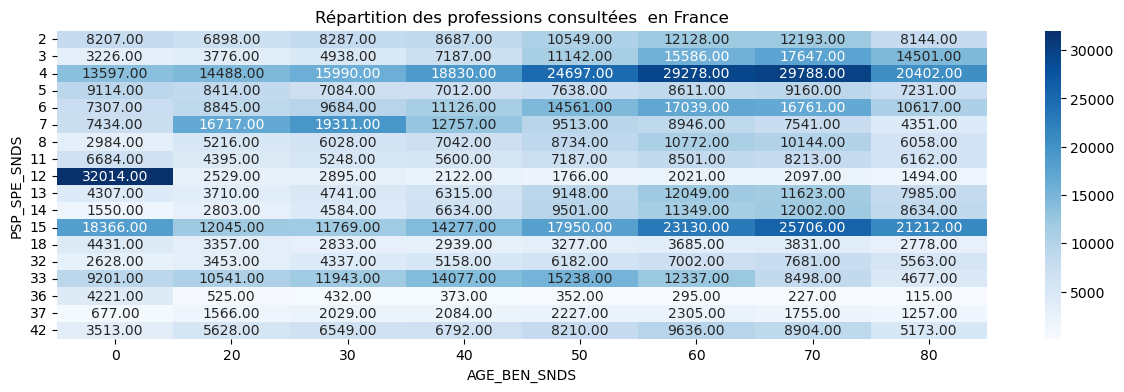

In [98]:
jobs = raw_data[['BEN_RES_REG', 'PSP_SPE_SNDS', 'AGE_BEN_SNDS']]
jobs = jobs[
    (jobs.PSP_SPE_SNDS != 99) 
    & (jobs.PSP_SPE_SNDS != 1) 
    & (jobs.PSP_SPE_SNDS != 0) 
    & (jobs.AGE_BEN_SNDS != 99) 
    & (jobs.BEN_RES_REG != 99)
    ]

pivot_jobs = jobs.pivot_table(index="PSP_SPE_SNDS", columns="AGE_BEN_SNDS", values="AGE_BEN_SNDS", aggfunc="count")

plt.figure(figsize=(15, 4))
sns.heatmap(pivot_jobs, annot=True, cmap="Blues", fmt='.2f')
plt.title('Répartition des professions consultées  en France')
plt.show()


| PSP_SPE_SNDS | Libellé Spécialité Médicale PS Prescripteur |
|--------------|--------------------------------------------|
| 0            | NON RENSEIGNE                              |
| 1            | MEDECINE GENERALE                          |
| 2            | ANESTHESIOLOGIE - REANIMATION               |
| 3            | PATHOLOGIE CARDIO-VASCULAIRE                |
| 4            | CHIRURGIE                                  |
| 5            | DERMATOLOGIE ET VENEROLOGIE                |
| 6            | RADIOLOGIE                                 |
| 7            | GYNECOLOGIE OBSTETRIQUE                    |
| 8            | GASTRO-ENTEROLOGIE ET HEPATOLOGIE           |
| 9            | MEDECINE INTERNE                           |
| 11           | OTO RHINO-LARYNGOLOGIE                     |
| 12           | PEDIATRIE                                  |
| 13           | PNEUMOLOGIE                                |
| 14           | RHUMATOLOGIE                               |
| 15           | OPHTALMOLOGIE                              |
| 18           | STOMATOLOGIE                               |
| 31           | MEDECINE PHYSIQUE ET DE READAPTATION       |
| 32           | NEUROLOGIE                                 |
| 33           | PSYCHIATRIE                                |
| 34           | GERIATRIE                                  |
| 35           | NEPHROLOGIE                                |
| 36           | CHIRURGIE DENTAIRE (SPECIALISTE O.D.F.)    |
| 37           | ANATOMIE-CYTOLOGIE-PATHOLOGIQUE            |
| 38           | DIRECTEUR LABORATOIRE MEDECIN              |
| 42           | ENDOCRINOLOGIE ET METABOLISMES             |
| 80           | SANTE PUBLIQUE ET MEDECINE SOCIALE         |
| 99           | VALEUR INCONNUE                            |


Entre la tranche d'âge de 40 à 49 ans et celle de 50 à 59 ans, on constate que les maladies cardiovasculaires sont les plus diagnostiquées. Ceci s'explique par le fait que les maladies cardiovasculaires sont la deuxième cause de mortalité dans le monde après les tumeurs.

La chirurgie est de plus en plus courante au cours de la vie d'une personne. Cela s'explique par le fait que les personnes âgées sont plus sujettes aux blessures et aux chutes en raison de la diminution de la force musculaire, de l'équilibre et de la coordination. Les personnes âgées sont également plus sujettes aux maladies chroniques qui nécessitent une intervention chirurgicale.

La pédiatrie, étant la spécialité médicale qui s'occupe des enfants, il est normal que la tranche d'âge de 0 à 19 ans soit la plus représentée.

Maintenant examinons les services les plus consultés par notre persona.

Nombre de lignes correspondant a notre personna vivant en Langudoc-Roussillon-Midi-Pyrénées : 28077
Nombre de lignes correspondant a notre personna : 35561


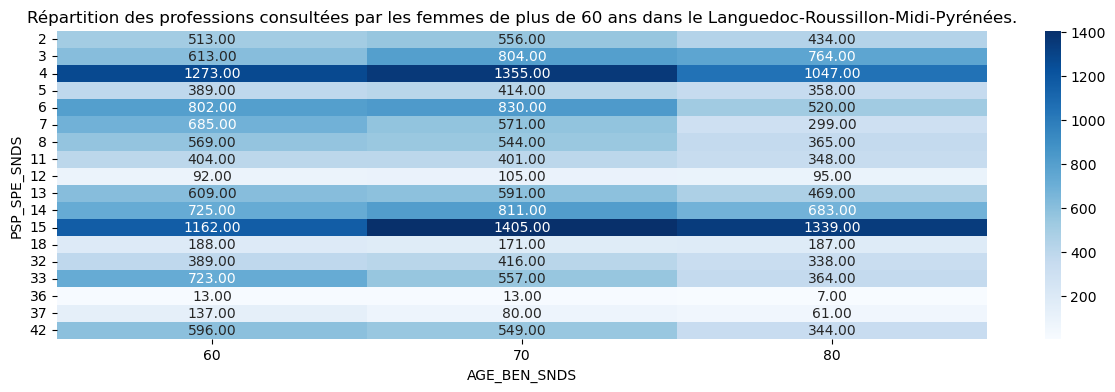

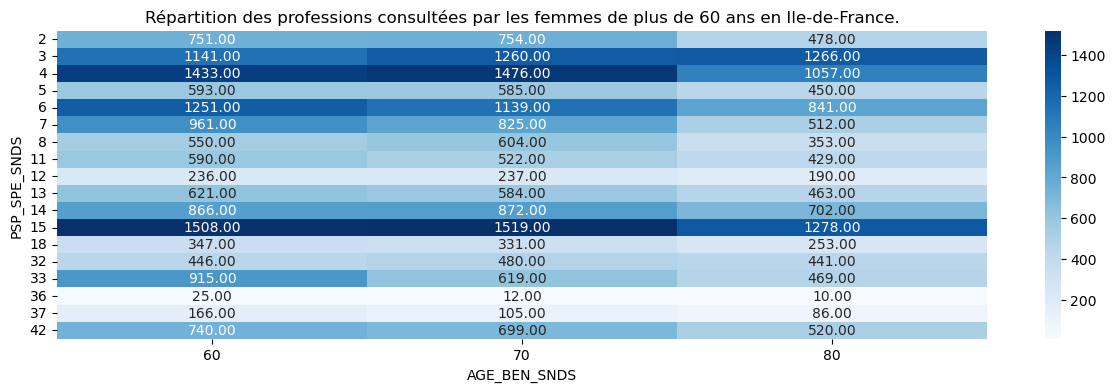

In [99]:
jobs = raw_data[['BEN_RES_REG', 'PSP_SPE_SNDS', 'AGE_BEN_SNDS', 'BEN_SEX_COD']]

persona_jobs_reg76 = jobs[
    (jobs.BEN_SEX_COD == 2) 
    & (jobs.AGE_BEN_SNDS >= 60) 
    & (jobs.BEN_RES_REG == 76) 
    & (jobs.BEN_RES_REG != 99)
    & (jobs.PSP_SPE_SNDS != 99) 
    & (jobs.PSP_SPE_SNDS != 1) 
    & (jobs.PSP_SPE_SNDS != 0) 
    & (jobs.AGE_BEN_SNDS != 99) 
    ]

persona_jobs_reg11 = jobs[
    (jobs.BEN_SEX_COD == 2) 
    & (jobs.AGE_BEN_SNDS >= 60) 
    & (jobs.BEN_RES_REG == 11) 
    & (jobs.BEN_RES_REG != 99)
    & (jobs.PSP_SPE_SNDS != 99) 
    & (jobs.PSP_SPE_SNDS != 1) 
    & (jobs.PSP_SPE_SNDS != 0) 
    & (jobs.AGE_BEN_SNDS != 99) 
    ]

print("Nombre de lignes correspondant a notre personna vivant en Langudoc-Roussillon-Midi-Pyrénées : " + str(len(persona_jobs_reg76)))
print("Nombre de lignes correspondant a notre personna : " + str(len(persona_jobs_reg11)))


pivot_jobs_reg76 = persona_jobs_reg76.pivot_table(index="PSP_SPE_SNDS", columns="AGE_BEN_SNDS", values="BEN_RES_REG", aggfunc="count")
pivot_jobs_reg11 = persona_jobs_reg11.pivot_table(index="PSP_SPE_SNDS", columns="AGE_BEN_SNDS", values="BEN_RES_REG", aggfunc="count")

plt.figure(figsize=(15, 4))
sns.heatmap(pivot_jobs_reg76, annot=True, cmap="Blues", fmt='.2f')
plt.title('Répartition des professions consultées par les femmes de plus de 60 ans dans le Languedoc-Roussillon-Midi-Pyrénées.')


plt.figure(figsize=(15, 4))
sns.heatmap(pivot_jobs_reg11, annot=True, cmap="Blues", fmt='.2f')
plt.title('Répartition des professions consultées par les femmes de plus de 60 ans en Ile-de-France.')

plt.show()


Ici, j'ai voulu comparer l'Ile-de-France avec le Languedoc-Roussillon-Midi-Pyrénées car selon notre analyse au dessus, l'Ile-de-France est la région avec la plus basse moyenne d'âge et le Languedoc-Roussillon-Midi-Pyrénées est la région avec la plus haute moyenne d'âge pour vérifier si les résultats sont cohérents.

En effet, le Langudoc-Roussillon-Midi-Pyrénées possédant environ six millions d'habitants alors que l'Ile-de-France en possède douze millions les résultats ne doublent pas pour autant. On peut constater que la tranche d'âge de 80 ans et plus est plus représentée en Ile-de-France qu'en Languedoc-Roussillon-Midi-Pyrénées témoingnant d'une meilleure espérance de vie et santé en Ile-de-France.

Les personnes agées consultant le pédiatre est assez inhabituel. Cela peut etre dû à des erreurs dans le dataset, des personnes agées ayant des troubles génétiques ou congénitaux tardifs  ou alors à des personnes agées qui ont la garde d'enfants en bas âge (grands-parents).

A partir de 60 ans, comme chez tous les humains, la vue diminue. Il est donc normal que les ophtalmologues soient les plus consultés par notre persona.

Ensuite viennent la chirurgie et la radiologie pour l'explication citée plus haut, car les personnes âgées sont sujettes aux blessures et aux chutes en raison de leur faiblesse musculaire.

En revanche, on observe une diminution significative des consultations chez les femmes âgées de 80 ans et plus. Dans certaines professions, on constate une réduction de moitié. Cela peut être dû au fait qu'il est plus rare d'atteidnre cet âge. Rappelons que l'âge de décès moyen en France est de 82,7 ans pour les femmes et de 75,49 ans pour les hommes.

# Identification d'un persona ayant peu besoin de soins

A la vue des précédents graphiques, on peut déjà émettre une hypothèse qu'il sera un homme agé de 20 à 29 ans vivant en Ile-de-France.
Il pourrat être intéressant d'identifier quelle est la profession la plus consultée par ce persona.

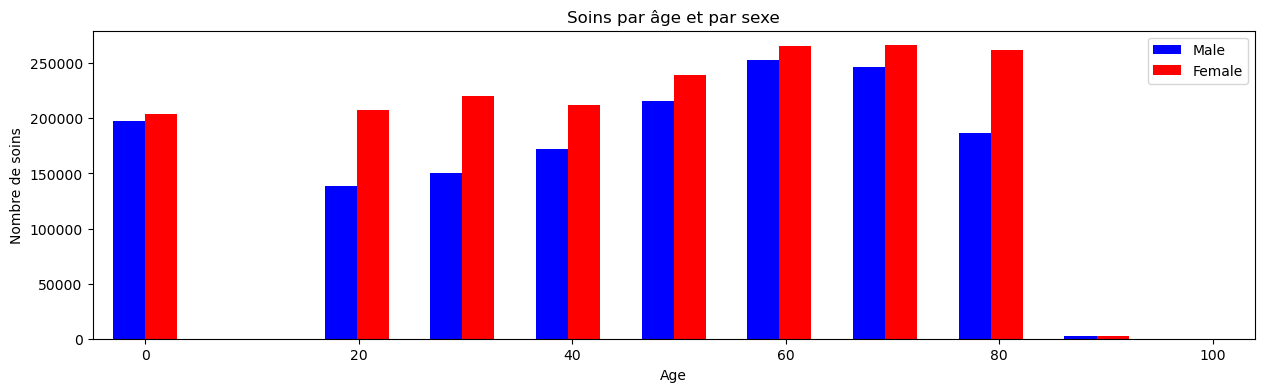

In [100]:
ageAndSex = raw_data[["BEN_SEX_COD", "AGE_BEN_SNDS"]]
male = ageAndSex.where(ageAndSex.BEN_SEX_COD == 1).dropna()
female = ageAndSex.where(ageAndSex.BEN_SEX_COD == 2).dropna()

plt.figure(figsize=(15, 4))

plt.title("Soins par âge et par sexe")
plt.xlabel("Age")
plt.ylabel("Nombre de soins")
plt.hist(male["AGE_BEN_SNDS"], label="Male", color="blue", width=-3)
plt.hist(female["AGE_BEN_SNDS"], label="Female", color="red", width=3)
plt.legend()
plt.show()

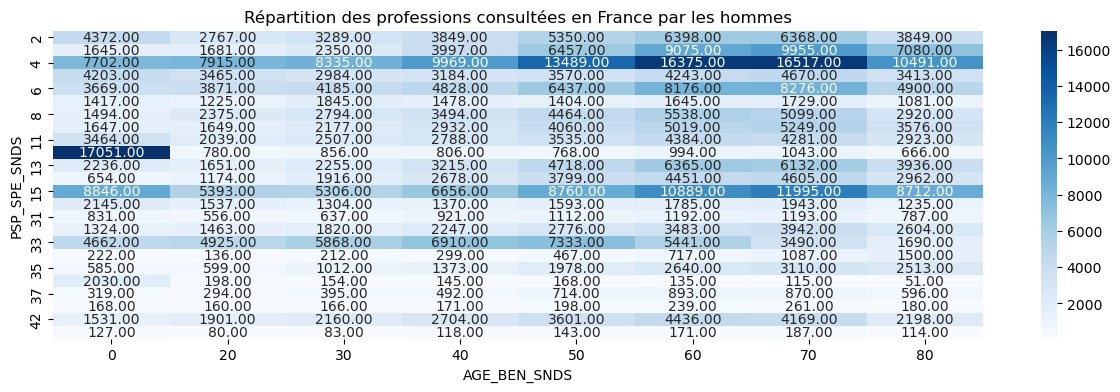

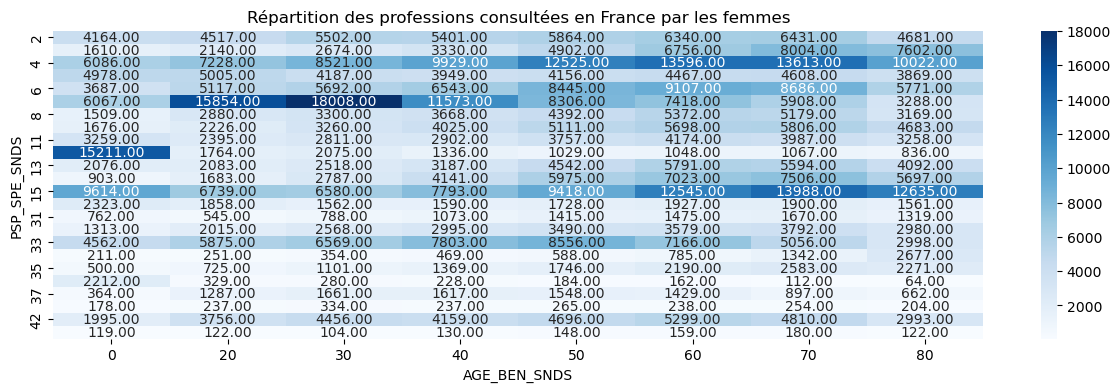

In [114]:
jobs = raw_data[['PSP_SPE_SNDS', 'AGE_BEN_SNDS', 'BEN_SEX_COD']]
males = jobs[
    (jobs.PSP_SPE_SNDS != 99) 
    & (jobs.PSP_SPE_SNDS != 1) 
    & (jobs.PSP_SPE_SNDS != 0) 
    & (jobs.AGE_BEN_SNDS != 99)
    & (jobs.BEN_SEX_COD == 1)
    ]

females = jobs[
    (jobs.PSP_SPE_SNDS != 99) 
    & (jobs.PSP_SPE_SNDS != 1) 
    & (jobs.PSP_SPE_SNDS != 0) 
    & (jobs.AGE_BEN_SNDS != 99)
    & (jobs.BEN_SEX_COD == 2)
    ]


pivot_males = males.pivot_table(index="PSP_SPE_SNDS", columns="AGE_BEN_SNDS", values="AGE_BEN_SNDS", aggfunc="count")
pivot_females = females.pivot_table(index="PSP_SPE_SNDS", columns="AGE_BEN_SNDS", values="AGE_BEN_SNDS", aggfunc="count")


plt.figure(figsize=(15, 4))
sns.heatmap(pivot_males, annot=True, cmap="Blues", fmt='.2f')
plt.title('Répartition des professions consultées en France par les hommes')

plt.figure(figsize=(15, 4))
sns.heatmap(pivot_females, annot=True, cmap="Blues", fmt='.2f')
plt.title('Répartition des professions consultées en France par les femmes')

plt.show()

On remarque tout de suite que les hommes agés de 20 à 29 sont beaucoup moins présents dans la heatmap.

Alors qu'au contraire, les femmes de cette tranche d'âge sont plus présentes du fait qu'elles peuvent tomber enceintes et avoir besoin de consulter un gynécologue.
Les hommes présents dans cette spécialité est une erreur dans le dataset. 

Ils sont plus présents dans les spécialités médicales suivantes :
- Chirugie
- Ophtalmologie
- Psychiatrie

La chirurgie s'explique par le fait que les hommes sont plus sujets aux blessures et aux chutes en raison de leur activité physique plus importante que les femmes.
La psychiatrie s'explique par le fait que les hommes sont plus sujets aux troubles mentaux

| PSP_SPE_SNDS | Libellé Spécialité Médicale PS Prescripteur |
|--------------|--------------------------------------------|
| 0            | NON RENSEIGNE                              |
| 1            | MEDECINE GENERALE                          |
| 2            | ANESTHESIOLOGIE - REANIMATION               |
| 3            | PATHOLOGIE CARDIO-VASCULAIRE                |
| 4            | CHIRURGIE                                  |
| 5            | DERMATOLOGIE ET VENEROLOGIE                |
| 6            | RADIOLOGIE                                 |
| 7            | GYNECOLOGIE OBSTETRIQUE                    |
| 8            | GASTRO-ENTEROLOGIE ET HEPATOLOGIE           |
| 9            | MEDECINE INTERNE                           |
| 11           | OTO RHINO-LARYNGOLOGIE                     |
| 12           | PEDIATRIE                                  |
| 13           | PNEUMOLOGIE                                |
| 14           | RHUMATOLOGIE                               |
| 15           | OPHTALMOLOGIE                              |
| 18           | STOMATOLOGIE                               |
| 31           | MEDECINE PHYSIQUE ET DE READAPTATION       |
| 32           | NEUROLOGIE                                 |
| 33           | PSYCHIATRIE                                |
| 34           | GERIATRIE                                  |
| 35           | NEPHROLOGIE                                |
| 36           | CHIRURGIE DENTAIRE (SPECIALISTE O.D.F.)    |
| 37           | ANATOMIE-CYTOLOGIE-PATHOLOGIQUE            |
| 38           | DIRECTEUR LABORATOIRE MEDECIN              |
| 42           | ENDOCRINOLOGIE ET METABOLISMES             |
| 80           | SANTE PUBLIQUE ET MEDECINE SOCIALE         |
| 99           | VALEUR INCONNUE                            |


### Quelle est la profession médicale la plus lucrative ?

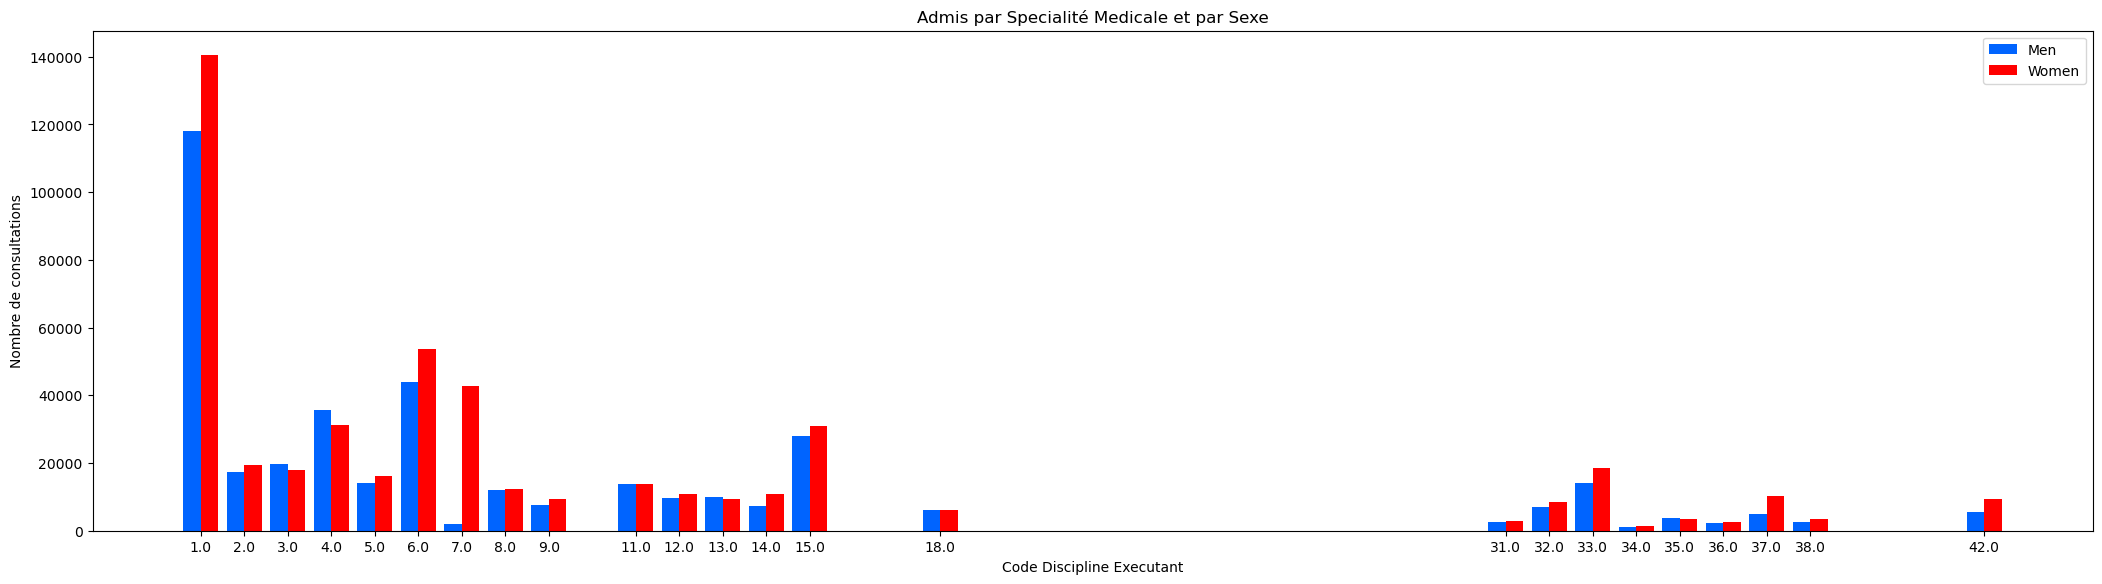

In [119]:
age_df = {
    "Age" : raw_data.AGE_BEN_SNDS[(raw_data.AGE_BEN_SNDS != 99)],
    "Sex" : raw_data.BEN_SEX_COD[(raw_data.BEN_SEX_COD != 0) & (raw_data.BEN_SEX_COD != 9)],
    "SpeExec" : raw_data.PSE_SPE_SNDS[(raw_data.PSE_SPE_SNDS!=0) & (raw_data.PSE_SPE_SNDS!=99) & (raw_data.PSE_SPE_SNDS!=80)]
}

age_df = pd.DataFrame(age_df).dropna()

occH = age_df.SpeExec.where(age_df.Sex == 1).dropna().value_counts()

occF = age_df.SpeExec.where(age_df.Sex == 2).dropna().value_counts()

ar = occH.keys().array
ar

fig = plt.figure(figsize=(20, 5))
ax = fig.add_axes([0,0,1,1])


men = ax.bar(occH.keys()-0.20, occH, width = 0.4, label = "Men", color = '#0064FF')
women = ax.bar(occF.keys()+0.2, occF, width = 0.4, label = "Women", color = '#FF0000')
ax.set_xlabel("Code Discipline Executant")
ax.set_ylabel("Nombre de consultations")
ax.legend()

plt.title("Admis par Specialité Medicale et par Sexe")
plt.xticks(ar, occH.keys())

plt.show()

Ici on peut voir que la médecine générale est une des professions les plus lucratives en France. Cela s'explique par le fait que les médecins généralistes sont les premiers interlocuteurs des patients. Ils sont donc les plus consultés.

Suivit de la radiologie et de la gynécologie obstétrique.
Ici on peut clairement voir les valeurs erronées dans la catégorie gynécologie obstétrique. Les femmes sont clairement surreprésentées dans cette catégorie.

# Conclusion

Dans cette étude, nous avons pu identifier un persona ayant peu besoin de soins. Il s'agit d'un homme agé de 20 à 29 ans vivant en Ile-de-France.
Au contraire, nous avons pu identifier un persona ayant beaucoup besoin de soins. Il s'agit d'une femme agée de 60 à 79 ans vivant en Languedoc-Roussillon-Midi-Pyrénées.

Cela peut venir du fait que l'île-de-France possède un accès aux soins plus important que le Languedoc-Roussillon-Midi-Pyrénées. En effet, l'île-de-France est la région la plus riche de France et possède donc plus de médecins et d'hopitaux que le Languedoc-Roussillon-Midi-Pyrénées.

Le climat peut aussi jouer un rôle important dans la santé des habitants. En effet, le climat méditerranéen du Languedoc-Roussillon-Midi-Pyrénées est plus chaud et plus sec que le climat océanique de l'île-de-France. Cela peut expliquer pourquoi les personnes agées sont plus sujettes aux maladies cardiovasculaires en Languedoc-Roussillon-Midi-Pyrénées qu'en Ile-de-France.

La médecine générale n'a pas été prise en compte lors des analyses car cela ne donne pas d'indices sur les maladies les plus diagnostiquées. En effet, les médecins généralistes sont les premiers interlocuteurs des patients et sont donc les plus consultés.

# Limites

Les données utilisées dans cette étude sont des données de Janvier 2022. Il serait intéressant de comparer ces données avec celles de Janvier 2021 pour voir l'impact de la pandémie de Covid-19 sur les dépenses de l'assurance maladie.